### Spanish Wine Quality (Flagship Analysis)

**Author:** Alexis Garduno<br>
**Date:** 06.12.2022<br>

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# For tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To check the model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [2]:
wineSPA=pd.read_csv(os.getcwd() +'/wines_SPA.csv')
print(wineSPA.shape)
print(wineSPA.nunique())
wineSPA.sort_values(by='wine',ascending=False).head()

(7500, 11)
winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1107,Barahonda,Zona Zepa Monastrell,2015,4.4,26,Espana,Yecla,59.90,Monastrell,5.0,3.0
750,Rodriguez Sanzo,Whisba Tempranillo Aged 18 Months in Whisky Ba...,2019,4.4,363,Espana,Toro,20.90,Toro Red,5.0,3.0
1080,Conreria d'Scala Dei,Voltons,2017,4.4,32,Espana,Priorato,51.95,Priorat Red,4.0,3.0
1592,Conreria d'Scala Dei,Voltons,2015,4.3,64,Espana,Priorato,47.00,Priorat Red,4.0,3.0
1097,David Moreno,Vobiscum,2015,4.4,28,Espana,Rioja,31.99,Rioja Red,4.0,3.0


In [3]:
wineSPA[(wineSPA.get('winery')=='Vega Sicilia') & (wineSPA.get('wine')=='Unico Reserva Especial Edicion')].sort_values(by='price')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
72,Vega Sicilia,Unico Reserva Especial Edicion,1996,4.7,442,Espana,Ribera del Duero,290.00,Ribera Del Duero Red,5.0,3.0
107,Vega Sicilia,Unico Reserva Especial Edicion,2011,4.7,131,Espana,Ribera del Duero,340.49,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
12,Vega Sicilia,Unico Reserva Especial Edicion,2018,4.8,438,Espana,Ribera del Duero,430.00,Ribera Del Duero Red,5.0,3.0
17,Vega Sicilia,Unico Reserva Especial Edicion,2019,4.8,250,Espana,Ribera del Duero,431.36,Ribera Del Duero Red,5.0,3.0
29,Vega Sicilia,Unico Reserva Especial Edicion,2020,4.8,84,Espana,Ribera del Duero,435.75,Ribera Del Duero Red,5.0,3.0
68,Vega Sicilia,Unico Reserva Especial Edicion,2017,4.7,560,Espana,Ribera del Duero,480.06,Ribera Del Duero Red,5.0,3.0
10,Vega Sicilia,Unico Reserva Especial Edicion,2016,4.8,591,Espana,Ribera del Duero,514.85,Ribera Del Duero Red,5.0,3.0
21,Vega Sicilia,Unico Reserva Especial Edicion,2013,4.8,172,Espana,Ribera del Duero,570.51,Ribera Del Duero Red,5.0,3.0


**Observations:** There are 7,500 entries in this dataset with 480 unique wineries, 847 unique wine brands, and 71 unique years.

In [4]:
def checkduplicates(wineSPA):
    print(wineSPA.shape)
    wine_combo=wineSPA.groupby(['winery','wine']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
    print(wine_combo)
    redundant=wineSPA[(wineSPA.get('winery') == 'Imperial') & (wineSPA.get('wine') == 'Rioja Reserva')].head(20)
    return(redundant)

#call function
checkduplicates(wineSPA) 

(7500, 11)
                               winery                   wine  count
475                          Imperial          Rioja Reserva    225
606                             Matsu               El Viejo    224
74                             Artadi             Valdegines    223
309                           Contino         Rioja Graciano    223
731                      Ramon Bilbao                  Mirto    223
..                                ...                    ...    ...
394                   Eulogio Pomares    Castineiro Albarino      1
395                   Eulogio Pomares  Maceracion Con Pieles      1
398                    Familia Torres               Milmanda      1
401                    Familia Torres           Reserva Real      1
930  l'Infernal Combier Fischer Gerin  Vinas Viejas Aguilera      1

[931 rows x 3 columns]


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1035,Imperial,Rioja Reserva,1982,4.4,41,Espana,Rioja,145.000000,Rioja Red,4.0,3.0
1199,Imperial,Rioja Reserva,2017,4.3,799,Espana,Rioja,25.450000,Rioja Red,4.0,3.0
1838,Imperial,Rioja Reserva,2015,4.2,3788,Espana,Rioja,19.833333,Rioja Red,4.0,3.0
1852,Imperial,Rioja Reserva,2016,4.2,2676,Espana,Rioja,24.750000,Rioja Red,4.0,3.0
1855,Imperial,Rioja Reserva,2014,4.2,2364,Espana,Rioja,27.600000,Rioja Red,4.0,3.0
2004,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.000000,Rioja Red,NaN,NaN
2029,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.000000,Rioja Red,4.0,3.0
2054,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.000000,Rioja Red,4.0,3.0
2079,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.000000,Rioja Red,4.0,3.0
2104,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.000000,Rioja Red,4.0,3.0


In [5]:
wineSPA=wineSPA.drop_duplicates(keep=False) #drop duplicate rows
checkduplicates(wineSPA) 

(1997, 11)
                               winery                            wine  count
857                      Vega Sicilia                           Unico     41
859                      Vega Sicilia                     Valbuena 5o     32
858                      Vega Sicilia  Unico Reserva Especial Edicion     24
49                    Alvaro Palacios  L'Ermita Velles Vinyes Priorat     18
347                 Dominio de Pingus                          Pingus     17
..                                ...                             ...    ...
388                   Eulogio Pomares             Castineiro Albarino      1
389                   Eulogio Pomares           Maceracion Con Pieles      1
392                    Familia Torres                        Milmanda      1
395                    Familia Torres                    Reserva Real      1
921  l'Infernal Combier Fischer Gerin           Vinas Viejas Aguilera      1

[922 rows x 3 columns]


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1035,Imperial,Rioja Reserva,1982,4.4,41,Espana,Rioja,145.000000,Rioja Red,4.0,3.0
1199,Imperial,Rioja Reserva,2017,4.3,799,Espana,Rioja,25.450000,Rioja Red,4.0,3.0
1838,Imperial,Rioja Reserva,2015,4.2,3788,Espana,Rioja,19.833333,Rioja Red,4.0,3.0
1852,Imperial,Rioja Reserva,2016,4.2,2676,Espana,Rioja,24.750000,Rioja Red,4.0,3.0
1855,Imperial,Rioja Reserva,2014,4.2,2364,Espana,Rioja,27.600000,Rioja Red,4.0,3.0


In [6]:
print(wineSPA.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1997 non-null   object 
 1   wine         1997 non-null   object 
 2   year         1995 non-null   object 
 3   rating       1997 non-null   float64
 4   num_reviews  1997 non-null   int64  
 5   country      1997 non-null   object 
 6   region       1997 non-null   object 
 7   price        1997 non-null   float64
 8   type         1894 non-null   object 
 9   body         1753 non-null   float64
 10  acidity      1753 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 187.2+ KB
None


In [7]:
wineSPA.describe()

,rating,num_reviews,price,body,acidity
count,1997.000000,1997.000000,1997.000000,1753.000000,1753.000000
mean,4.406209,578.493240,137.858595,4.261266,2.920707
std,0.145340,1393.305209,275.117458,0.653555,0.336157
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,57.000000,32.460000,4.000000,3.000000
50%,4.400000,135.000000,54.500000,4.000000,3.000000
75%,4.500000,501.000000,113.200000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [8]:
wineSPA[wineSPA.get('year').isnull()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Espana,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [9]:
wineSPA[(wineSPA.get('winery')=='Vega Sicilia') & (wineSPA.get('wine')=='Unico Reserva Especial Edicion')].sort_values(by='price')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
72,Vega Sicilia,Unico Reserva Especial Edicion,1996,4.7,442,Espana,Ribera del Duero,290.00,Ribera Del Duero Red,5.0,3.0
107,Vega Sicilia,Unico Reserva Especial Edicion,2011,4.7,131,Espana,Ribera del Duero,340.49,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
12,Vega Sicilia,Unico Reserva Especial Edicion,2018,4.8,438,Espana,Ribera del Duero,430.00,Ribera Del Duero Red,5.0,3.0
17,Vega Sicilia,Unico Reserva Especial Edicion,2019,4.8,250,Espana,Ribera del Duero,431.36,Ribera Del Duero Red,5.0,3.0
29,Vega Sicilia,Unico Reserva Especial Edicion,2020,4.8,84,Espana,Ribera del Duero,435.75,Ribera Del Duero Red,5.0,3.0
68,Vega Sicilia,Unico Reserva Especial Edicion,2017,4.7,560,Espana,Ribera del Duero,480.06,Ribera Del Duero Red,5.0,3.0
10,Vega Sicilia,Unico Reserva Especial Edicion,2016,4.8,591,Espana,Ribera del Duero,514.85,Ribera Del Duero Red,5.0,3.0
21,Vega Sicilia,Unico Reserva Especial Edicion,2013,4.8,172,Espana,Ribera del Duero,570.51,Ribera Del Duero Red,5.0,3.0


**Observations:** There are a lot of reviews for the record missing the year. For this wine, the year is missing. Possible strategies to address missing in this particular case (specifically dealing with a categorical variable) includes deleting the observation, replacing the missing value with the most frequent value, deleting the variable with the missing variable, predicting the missing value, or coding as unknown. This record has a lot of information (specifically ratings), so we should not delete it. The approaches don't seem reasonable given that we are talking about year; this value will be coded as 'Unknown', and the variable will be operationalized as categorical.

In [10]:
wineSPA['year'] = wineSPA['year'].fillna('Unknown')

**Explore Missingness in this Data**: This dataset is relatively small, so we don't want to just delete missing values. It will be helpful to understand if there is a pattern of missingness in this data, and then go from there. In the section below, body and acidity are using misisng together, and occasionally all three (body, acidity, and type) are missing.

In [11]:
percent_missing = wineSPA.isnull().sum() * 100 / len(wineSPA)
missing_value_df = pd.DataFrame({'column_name': wineSPA.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
winery,winery,0.000000
wine,wine,0.000000
year,year,0.000000
rating,rating,0.000000
num_reviews,num_reviews,0.000000
country,country,0.000000
region,region,0.000000
price,price,0.000000
type,type,5.157737
body,body,12.218327


<AxesSubplot:>

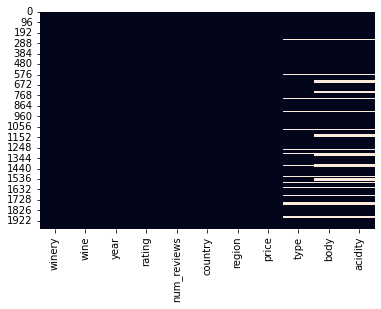

In [12]:
sns.heatmap(wineSPA.isnull(), cbar=False)

### KNN imputer wil be used to fill in these missing values

A parameter that you need to choose for the K nearest neighbors; we will explore differences in the imputation between choosing neighbors. Compare imputed and non-imputed datasets.

In [13]:
wineSPA['type'] = wineSPA['type'].fillna('Unknown')
wineSPA_copy=wineSPA.copy() #make a deep copy
imputer=KNNImputer(n_neighbors=10) #imputation didn't run for neighbors of 2 or less
wineSPA_copy[['body','acidity']]=imputer.fit_transform(wineSPA_copy[['body','acidity']]) #imputation function returns numpy array; convert to pandas dataframe

In [14]:
percent_missing = wineSPA_copy.isnull().sum() * 100 / len(wineSPA_copy)
missing_value_df = pd.DataFrame({'column_name': wineSPA_copy.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
winery,winery,0.0
wine,wine,0.0
year,year,0.0
rating,rating,0.0
num_reviews,num_reviews,0.0
country,country,0.0
region,region,0.0
price,price,0.0
type,type,0.0
body,body,0.0


In [15]:
print(wineSPA_copy.describe().T) #imputed 
print(wineSPA.describe().T) #non-imputed

              count        mean          std    min    25%    50%    75%  \
rating       1997.0    4.406209     0.145340   4.20   4.30    4.4    4.5   
num_reviews  1997.0  578.493240  1393.305209  25.00  57.00  135.0  501.0   
price        1997.0  137.858595   275.117458   4.99  32.46   54.5  113.2   
body         1997.0    4.261266     0.612307   2.00   4.00    4.0    5.0   
acidity      1997.0    2.920707     0.314941   1.00   3.00    3.0    3.0   

                  max  
rating           4.90  
num_reviews  32624.00  
price         3119.08  
body             5.00  
acidity          3.00  
              count        mean          std    min    25%    50%    75%  \
rating       1997.0    4.406209     0.145340   4.20   4.30    4.4    4.5   
num_reviews  1997.0  578.493240  1393.305209  25.00  57.00  135.0  501.0   
price        1997.0  137.858595   275.117458   4.99  32.46   54.5  113.2   
body         1753.0    4.261266     0.653555   2.00   4.00    4.0    5.0   
acidity      1753.0

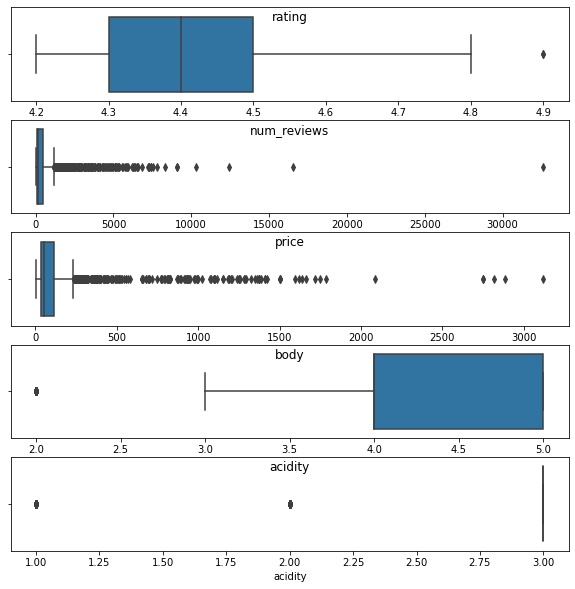

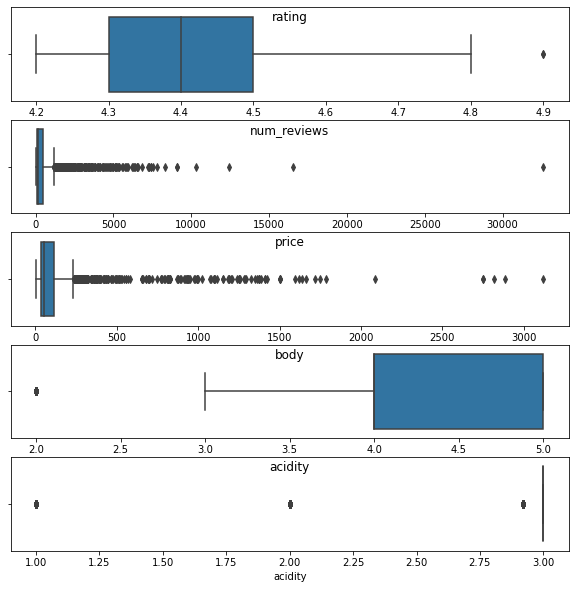

In [16]:
for df in (wineSPA,wineSPA_copy):
    fig, axes = plt.subplots(5,1, figsize = (10,10))
    num_cols=df.select_dtypes(include='number').columns
    for count,index in enumerate(num_cols):
        axes[count].set_title(index, y=1.0, pad=-14)
        sns.boxplot(x=index, data=df, ax=axes[count]);

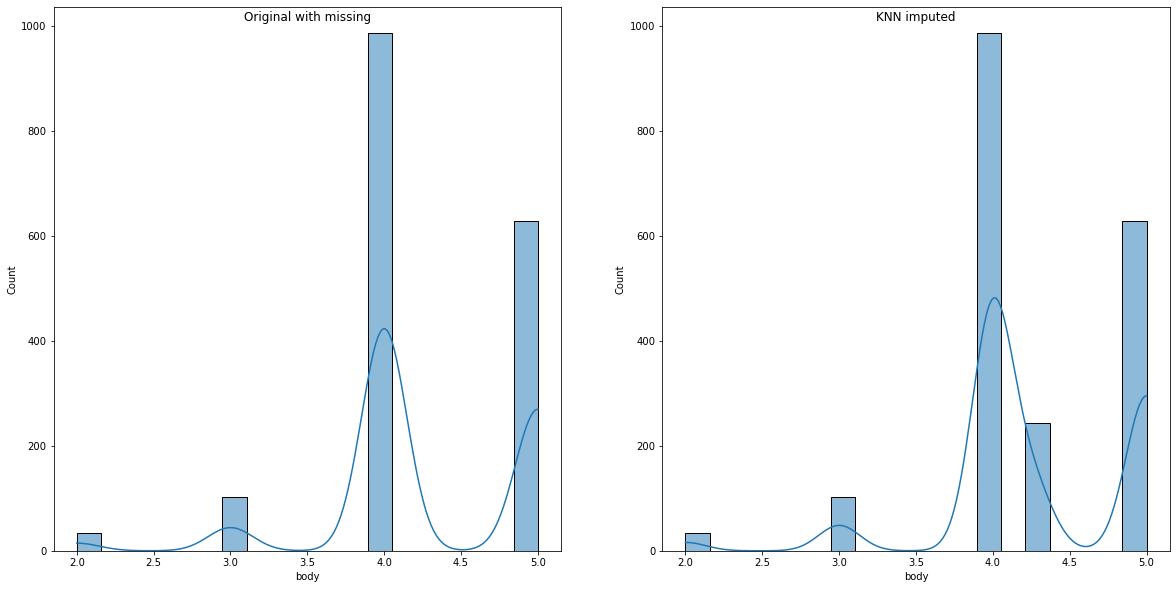

In [17]:
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title('Original with missing', y=1.0, pad=-14)
sns.histplot(x = 'body', data = wineSPA, kde = True, ax = axes[0]);
axes[1].set_title('KNN imputed', y=1.0, pad=-14)
sns.histplot(x = 'body', data = wineSPA_copy, kde = True, ax = axes[1]);

#### Examined some commmonly used transformations in combination with the log-transformation

The log-transformation brought the data closer to being normally distributed, but the best transformation was seen after doing a log-transformation and then a min max scaler afterwards, which is shown in the last plot.

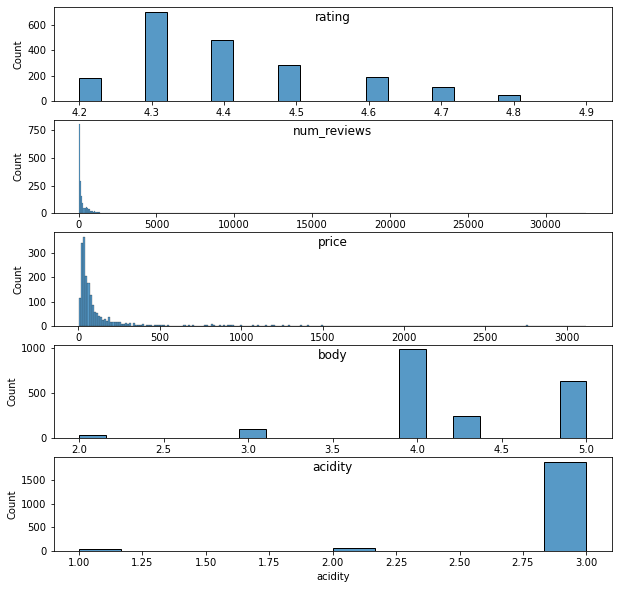

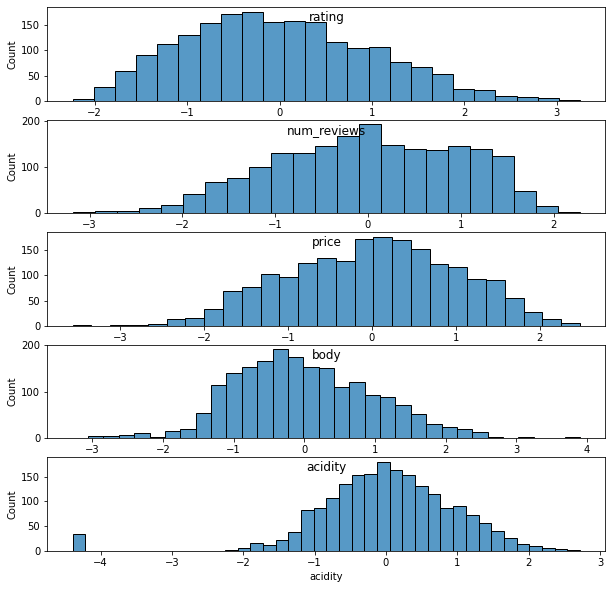

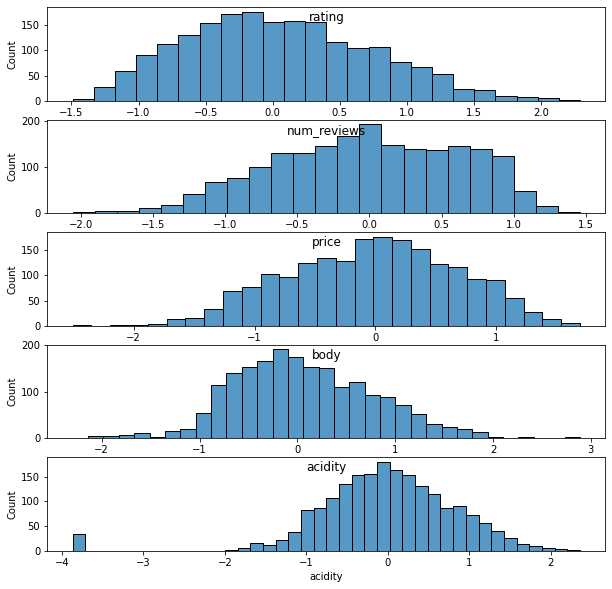

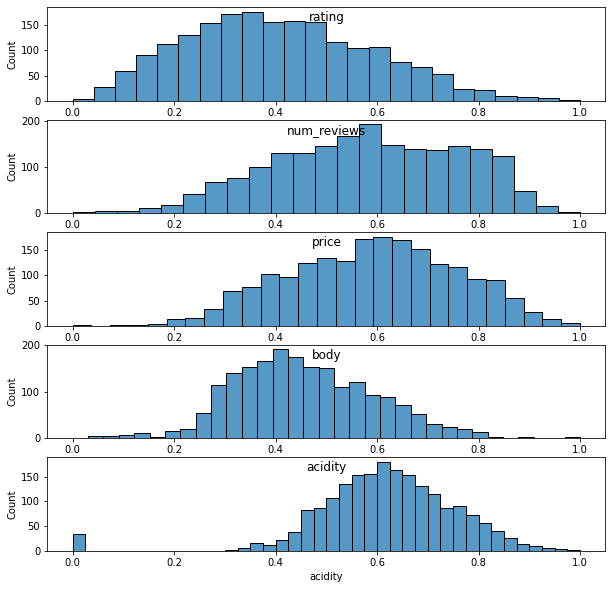

In [18]:
#original, non-scaled 
fig, axes = plt.subplots(5,1, figsize = (10,10))
for count,index in enumerate(num_cols):
    axes[count].set_title(index, y=1.0, pad=-14)
    sns.histplot(x=index, data=wineSPA_copy, ax=axes[count]);
#scaled
scaler=[StandardScaler(),RobustScaler(),MinMaxScaler()] #will likely standardize after applying another transformation

for i in scaler:
    wineSPA_copy2=wineSPA_copy.copy() #create copy every time, so don't just sequentially applying all transformations
    wineSPA_copy2.loc[:, num_cols]=sklearn.preprocessing.normalize(np.log(wineSPA_copy2[num_cols]))
    wineSPA_copy2[num_cols]=i.fit_transform(wineSPA_copy2[num_cols])
    fig, axes = plt.subplots(5,1, figsize = (10,10))
    for count,index in enumerate(num_cols):
            axes[count].set_title(index, y=1.0, pad=-14)
            sns.histplot(x=index, data=wineSPA_copy2, ax=axes[count]);

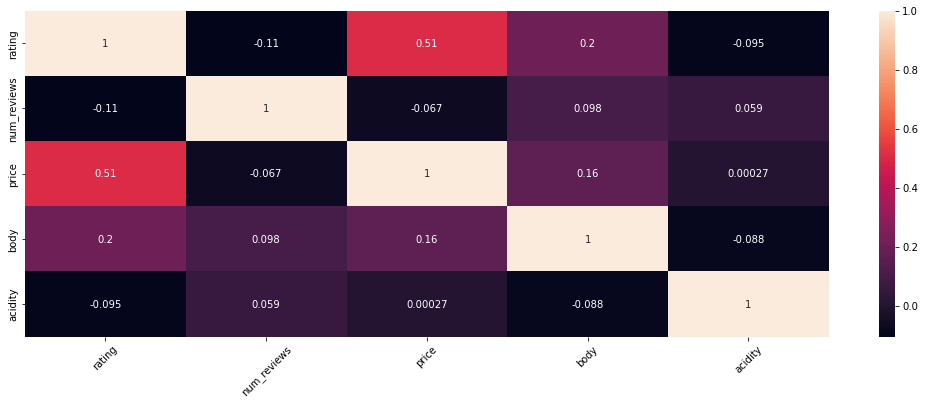

In [60]:
fig = plt.figure(figsize = (18, 6))
sns.heatmap(wineSPA_copy.loc[:, num_cols].corr(), annot = True);
plt.xticks(rotation = 45);

## Check for balanced vs. unbalanced dataset

We are going to make a recommendation about the type of wine, so it will be important to be sensitive to newer brands with less reviews potentially. This data is very unbalanced; in making a recommendation, we don't want the recommendation to be highly biased by some wine types being overrepresented in the dataset.

<AxesSubplot:xlabel='type', ylabel='index'>

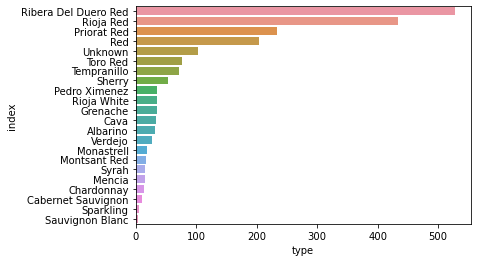

In [19]:
sumcount=wineSPA_copy.get('type').value_counts().reset_index()
sns.barplot(x='type',y='index',data=sumcount)

In [20]:
totalrows=wineSPA_copy.get('type').value_counts().sum()
winetype_balance=wineSPA_copy.get('type').value_counts()
values=round(winetype_balance/totalrows,2)#array of the weights
values

Ribera Del Duero Red    0.26
Rioja Red               0.22
Priorat Red             0.12
Red                     0.10
Unknown                 0.05
Toro Red                0.04
Tempranillo             0.04
Sherry                  0.03
Pedro Ximenez           0.02
Rioja White             0.02
Grenache                0.02
Cava                    0.02
Albarino                0.02
Verdejo                 0.01
Monastrell              0.01
Montsant Red            0.01
Syrah                   0.01
Mencia                  0.01
Chardonnay              0.01
Cabernet Sauvignon      0.01
Sparkling               0.00
Sauvignon Blanc         0.00
Name: type, dtype: float64

In [21]:
summary=wineSPA_copy.get(['type','num_reviews']).groupby('type').describe()
summary.sort_values(by=[('num_reviews', 'count')], ascending=False)

num_reviews                                          \
                           count         mean          std   min     25%   
type                                                                       
Ribera Del Duero Red       527.0   867.053131  1482.261188  25.0   84.50   
Rioja Red                  433.0   739.512702  1525.265602  25.0   61.00   
Priorat Red                234.0   218.482906   306.376402  26.0   60.00   
Red                        204.0   584.205882  2439.943435  25.0   39.75   
Unknown                    103.0   239.601942   780.558703  25.0   37.50   
Toro Red                    76.0  1020.618421  1536.991069  27.0  108.00   
Tempranillo                 71.0   179.901408   204.445603  27.0   63.00   
Sherry                      54.0   215.148148   327.729433  25.0   41.00   
Grenache                    35.0   425.542857   582.100423  25.0   33.50   
Pedro Ximenez               35.0   182.828571   282.000259  25.0   46.00   
Rioja White                 35.0   211.428571   288.769732  26.0   46.50   
Cava                        33.0   161.787879   247.674781  27.0   49.00   
Albarino                    32.0   411.281250   994.911286  25.0   45.00   
Verdejo                     27.0   308.666667   414.798190  25.0   39.00   
Monastrell                  18.0   221.055556   212.699587  26.0   79.25   
Montsant Red                17.0   106.058824    65.654846  26.0   39.00   
Syrah                       15.0   315.000000   398.248845  32.0   88.50   
Mencia                      15.0   123.666667   160.312938  32.0   46.00   
Chardonnay                  13.0   234.769231   211.578257  53.0   96.00   
Cabernet Sauvignon          11.0   888.363636  1103.582826  27.0  118.50   
Sparkling                    5.0    52.600000    25.618353  25.0   34.00   
Sauvignon Blanc              4.0    47.250000    24.581497  27.0   35.25   

                                               
                        50%      75%      max  
type                                           
Ribera Del Duero Red  218.0   932.50  12421.0  
Rioja Red             203.0   732.00  16505.0  
Priorat Red           107.0   221.50   3225.0  
Red                    80.5   327.75  32624.0  
Unknown                72.0   163.00   7401.0  
Toro Red              354.0  1218.25   6345.0  
Tempranillo           122.0   181.50   1064.0  
Sherry                 74.0   153.00   1452.0  
Grenache              105.0   592.50   1948.0  
Pedro Ximenez          70.0   143.00   1155.0  
Rioja White           122.0   198.50   1301.0  
Cava                   69.0   155.00   1269.0  
Albarino              114.0   286.00   4610.0  
Verdejo                80.0   334.00   1230.0  
Monastrell            148.0   291.50    745.0  
Montsant Red           99.0   165.00    214.0  
Syrah                 133.0   321.50   1337.0  
Mencia                 83.0   116.00    676.0  
Chardonnay            131.0   244.00    674.0  
Cabernet Sauvignon    237.0  1380.50   2911.0  
Sparkling              45.0    77.00     82.0  
Sauvignon Blanc        39.5    51.50     83.0

#### Perform hot-encoding or generate dummy variables for categorical variables used in modeling

In [22]:
cat_col=['winery', 'wine', 'year', 'country', 'region','type']
wineSPA_copy=pd.get_dummies(data = wineSPA_copy, columns = cat_col, drop_first = True).reset_index().set_index('index')

### Dependent Variable: Rating Group
Rating will be binned into different groups and then we will assess model performance based on rating group.

In [23]:
from sklearn.preprocessing import label_binarize
labels=['T1','T2','T3']
wineSPA_copy['quartile_rating']=pd.qcut(wineSPA_copy['rating'], 3, labels=labels)#quartiles can be generated
wineSPA_copy['quartile_rating'].replace({"T1": "T12", "T2": "T12"}, inplace=True)
wineSPA_copy['quartile_rating']=label_binarize(wineSPA_copy['quartile_rating'], classes=['T12','T3'])
print(wineSPA_copy.get('quartile_rating').value_counts())
n_classes = wineSPA_copy.get('quartile_rating').value_counts().shape[0]

0    1367
1     630
Name: quartile_rating, dtype: int64


***Split the dataset into 70% training and 30% test set***

In [24]:
Y = wineSPA_copy.quartile_rating
X = wineSPA_copy.drop(['quartile_rating','rating'], axis = 1)
#combine three quartiles and leave the last quartile
print(wineSPA_copy.quartile_rating.unique())
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
#oversample with SMOTE to compare with results
sm = SMOTE(random_state=27)
sm_x_train, sm_y_train = sm.fit_resample(x_train,y_train)

[1 0]


#### Classification Report

In [25]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['T12','T3'], yticklabels = ['T12','T3'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [26]:
wine_type_col = ['type_Toro Red', 'type_Tempranillo', 'type_Ribera Del Duero Red',
       'type_Pedro Ximenez', 'type_Red', 'type_Sherry',
       'type_Priorat Red', 'type_Rioja Red', 'type_Rioja White',
       'type_Grenache', 'type_Unknown', 'type_Cava', 'type_Verdejo',
       'type_Syrah', 'type_Monastrell', 'type_Mencia', 'type_Sparkling',
       'type_Montsant Red', 'type_Chardonnay',
       'type_Cabernet Sauvignon', 'type_Sauvignon Blanc']

### Model 1: Logistic Regression

In [27]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       956
           1       0.85      0.57      0.68       441

    accuracy                           0.83      1397
   macro avg       0.84      0.76      0.78      1397
weighted avg       0.83      0.83      0.82      1397



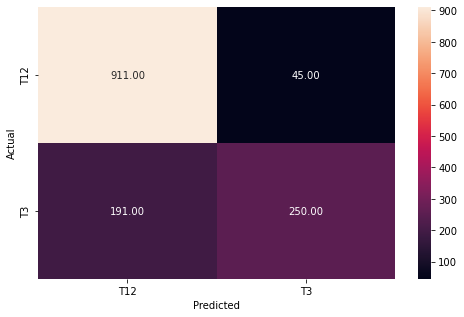

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       411
           1       0.85      0.48      0.61       189

    accuracy                           0.81       600
   macro avg       0.83      0.72      0.74       600
weighted avg       0.82      0.81      0.79       600



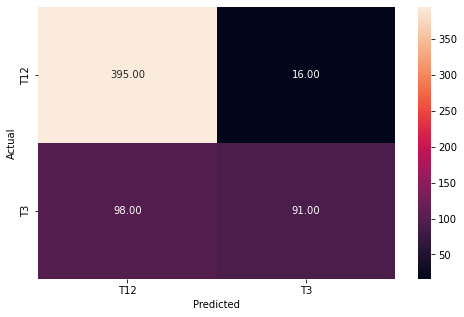

In [28]:
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)      

In [29]:
cols = X.columns
coef_lg = lg.coef_
odds = np.exp(lg.coef_[0]) # Finding the odds
pd.DataFrame(odds, x_train.columns, columns = ['odds']).loc[wine_type_col].sort_values(by = 'odds', ascending = False)

,odds
type_Red,2.934019
type_Toro Red,1.713232
type_Ribera Del Duero Red,1.462169
type_Monastrell,1.329570
type_Rioja Red,1.264924
type_Grenache,1.231595
type_Sparkling,1.130768
type_Verdejo,1.027840
type_Cava,1.025586
type_Syrah,1.010089


**The Precision-Recall Curve for Logistic Regression**

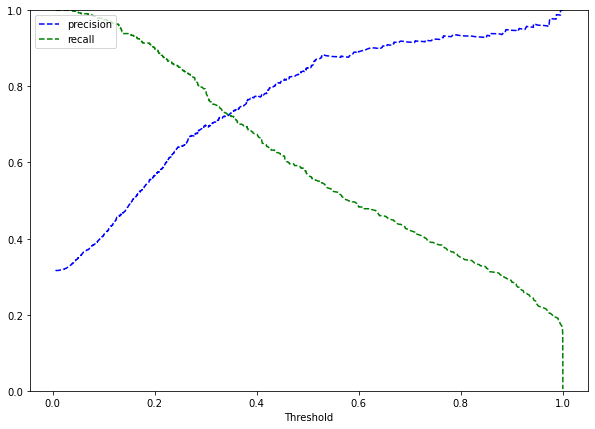

In [30]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

#### Add into oversampling to reduce oversensitivity to over-represented cases

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       956
           1       0.89      0.80      0.84       956

    accuracy                           0.85      1912
   macro avg       0.85      0.85      0.85      1912
weighted avg       0.85      0.85      0.85      1912



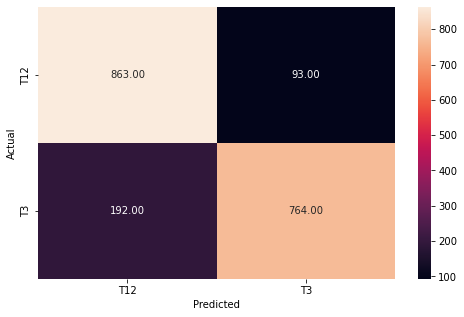

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       411
           1       0.66      0.57      0.61       189

    accuracy                           0.77       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.77      0.77      0.77       600



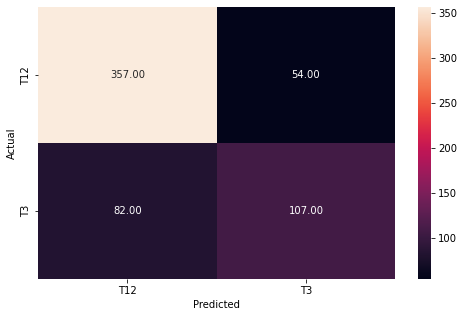

,odds
type_Sparkling,0.967938
type_Sauvignon Blanc,0.931216
type_Monastrell,0.873014
type_Verdejo,0.791368
type_Mencia,0.772981
type_Syrah,0.724742
type_Cabernet Sauvignon,0.720162
type_Cava,0.678485
type_Chardonnay,0.634447
type_Rioja White,0.553114


In [31]:
lg = LogisticRegression()
lg.fit(sm_x_train,sm_y_train)

y_pred_train = lg.predict(sm_x_train)
metrics_score(sm_y_train, y_pred_train)
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)    

cols = sm_x_train.columns
coef_lg = lg.coef_
odds = np.exp(lg.coef_[0]) # Finding the odds
pd.DataFrame(odds, sm_x_train.columns, columns = ['odds']).loc[wine_type_col].sort_values(by = 'odds', ascending = False)

**The Precision-Recall Curve for Logistic Regression after Oversampling**

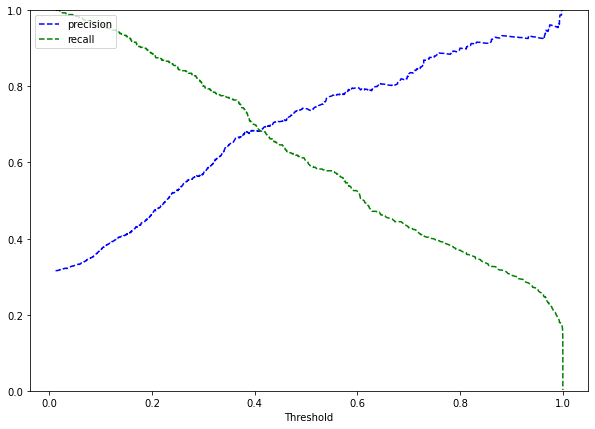

In [32]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

### Model 2: Linear Discriminant Analysis

First, we will begin with a simple model and then see if added complexity improves mode prediction.

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       956
           1       0.90      0.90      0.90       441

    accuracy                           0.94      1397
   macro avg       0.93      0.93      0.93      1397
weighted avg       0.94      0.94      0.94      1397



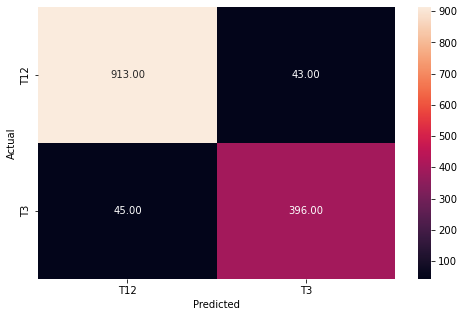

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       411
           1       0.64      0.56      0.59       189

    accuracy                           0.76       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.75      0.76      0.76       600



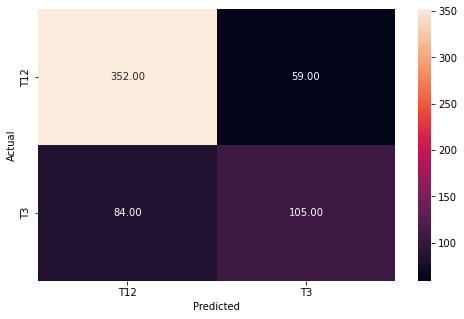

In [33]:
lda = OneVsRestClassifier(LinearDiscriminantAnalysis())
lda.fit(x_train, y_train)
y_pred_train_lda = lda.predict(x_train)
y_pred_test_lda = lda.predict(x_test)
metrics_score(y_train, y_pred_train_lda)
metrics_score(y_test,y_pred_test_lda)

### Look at ROC curve

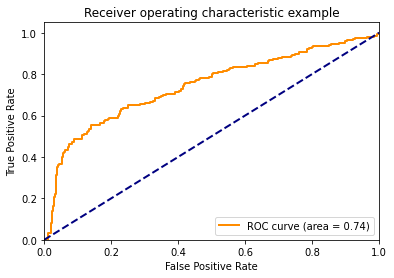

In [34]:
y_score = lda.fit(x_train, y_train).decision_function(x_test)
for i in range(1):
    fpr, tpr, _ = roc_curve(y_test[:], y_score[:])
    roc_auc = auc(fpr, tpr)
roc_auc

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Linear Discriminant Analysis - Parameter Classification

In [35]:
#wine_type_col="type_"+wineSPA.type.unique()
wine_type_col = ['type_Toro Red', 'type_Tempranillo', 'type_Ribera Del Duero Red',
       'type_Pedro Ximenez', 'type_Red', 'type_Sherry',
       'type_Priorat Red', 'type_Rioja Red', 'type_Rioja White',
       'type_Grenache', 'type_Unknown', 'type_Cava', 'type_Verdejo',
       'type_Syrah', 'type_Monastrell', 'type_Mencia', 'type_Sparkling',
       'type_Montsant Red', 'type_Chardonnay',
       'type_Cabernet Sauvignon', 'type_Sauvignon Blanc','Bias']
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
df11=pd.DataFrame(lda.coef_[0].reshape(-1,1),X.columns,columns=["Weight"])
df12=pd.DataFrame(lda.intercept_[0].reshape(-1,1),["Bias"],columns=["Weight"])
params = pd.concat([df12, df11], axis=0)

df13=pd.DataFrame(lda.means_[0].reshape(-1,1),X.columns,columns=["Group Means"])
params = pd.concat([df13, params], axis=1).loc[wine_type_col].sort_values(by='Weight',ascending=False)
params

,Group Means,Weight
type_Sparkling,0.003138,3.745301
type_Tempranillo,0.032427,2.186323
type_Pedro Ximenez,0.015690,1.987135
type_Cava,0.014644,1.543582
type_Toro Red,0.034519,1.113874
type_Rioja Red,0.232218,0.875651
type_Priorat Red,0.122385,0.273973
type_Red,0.106695,0.203644
type_Mencia,0.008368,-0.212533
type_Ribera Del Duero Red,0.208159,-0.460368


### Model 2: Linear Discriminant Analysis with Oversampling added

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       956
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1912
   macro avg       0.95      0.95      0.95      1912
weighted avg       0.95      0.95      0.95      1912



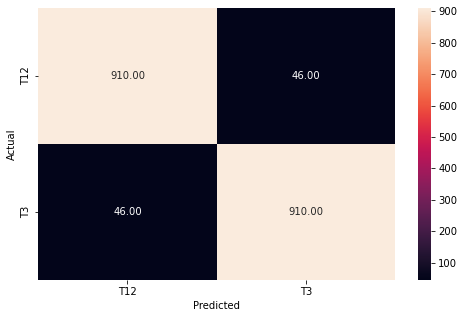

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       411
           1       0.48      0.66      0.55       189

    accuracy                           0.67       600
   macro avg       0.64      0.66      0.64       600
weighted avg       0.71      0.67      0.68       600



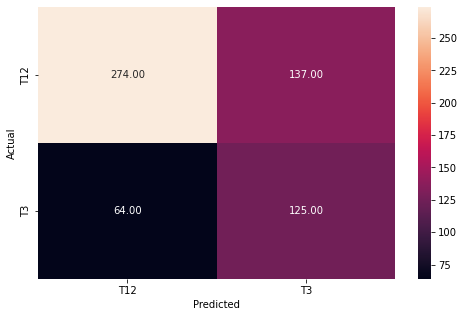

In [61]:
lda = OneVsRestClassifier(LinearDiscriminantAnalysis())
lda.fit(sm_x_train, sm_y_train)
y_pred_train_lda = lda.predict(sm_x_train)
y_pred_test_lda = lda.predict(x_test)
metrics_score(sm_y_train, y_pred_train_lda)
metrics_score(y_test,y_pred_test_lda)

In [62]:
wine_type_col = ['type_Toro Red', 'type_Tempranillo', 'type_Ribera Del Duero Red',
       'type_Pedro Ximenez', 'type_Red', 'type_Sherry',
       'type_Priorat Red', 'type_Rioja Red', 'type_Rioja White',
       'type_Grenache', 'type_Unknown', 'type_Cava', 'type_Verdejo',
       'type_Syrah', 'type_Monastrell', 'type_Mencia', 'type_Sparkling',
       'type_Montsant Red', 'type_Chardonnay',
       'type_Cabernet Sauvignon', 'type_Sauvignon Blanc','Bias']
lda = LinearDiscriminantAnalysis()
lda.fit(sm_x_train, sm_y_train)
df11=pd.DataFrame(lda.coef_[0].reshape(-1,1),X.columns,columns=["Weight"])
df12=pd.DataFrame(lda.intercept_[0].reshape(-1,1),["Bias"],columns=["Weight"])
params = pd.concat([df12, df11], axis=0)

df13=pd.DataFrame(lda.means_[0].reshape(-1,1),X.columns,columns=["Group Means"])
params = pd.concat([df13, params], axis=1).loc[wine_type_col].sort_values(by='Weight',ascending=False)
params

,Group Means,Weight
Bias,NaN,10.755868
type_Rioja Red,0.232218,0.347213
type_Red,0.106695,0.334245
type_Priorat Red,0.122385,-0.008730
type_Ribera Del Duero Red,0.208159,-0.399393
type_Sparkling,0.003138,-2.191662
type_Toro Red,0.034519,-2.230833
type_Monastrell,0.006276,-4.359695
type_Tempranillo,0.032427,-4.436093
type_Cava,0.014644,-4.654731


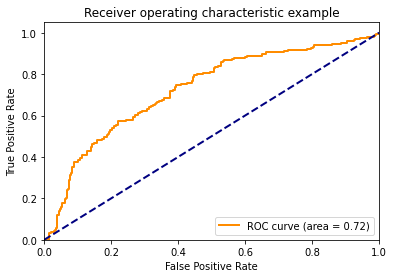

In [37]:
y_score = lda.fit(sm_x_train, sm_y_train).decision_function(x_test)
for i in range(1):
    fpr, tpr, _ = roc_curve(y_test[:], y_score[:])
    roc_auc = auc(fpr, tpr)
roc_auc

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#### Look into Hyperparameter Tuning

In [38]:
# define model evaluation method
lda = LinearDiscriminantAnalysis()
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(lda.fit(x_train, y_train), grid, scoring='accuracy', n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.795
Config: {'solver': 'lsqr'}


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       956
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1912
   macro avg       0.95      0.95      0.95      1912
weighted avg       0.95      0.95      0.95      1912



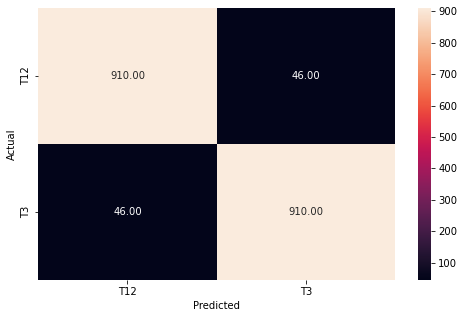

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       411
           1       0.53      0.62      0.57       189

    accuracy                           0.71       600
   macro avg       0.67      0.68      0.67       600
weighted avg       0.72      0.71      0.71       600



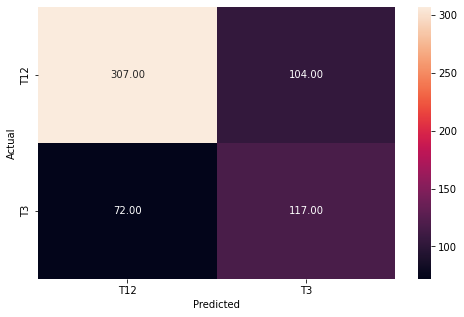

In [39]:
lda = OneVsRestClassifier(LinearDiscriminantAnalysis(solver='lsqr'))
lda.fit(sm_x_train, sm_y_train)
y_pred_train_lda = lda.predict(sm_x_train)
y_pred_test_lda = lda.predict(x_test)
metrics_score(sm_y_train, y_pred_train_lda)
metrics_score(y_test,y_pred_test_lda)

### Drop Outliers 

So, the oversampled logistic regression is performing better than the linear discriminate analysis. Attempt to remove outliers to see if this improves performance.

In [40]:
#original sizes
# print(x_train.shape)
# print(sm_x_train.shape)
# for x in ['num_reviews','price', 'body','acidity']:
#     q75,q25 = np.percentile(x_train.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     min = q25-(5*intr_qr) #changed from 1.5 to avoid losing too many values, want to keep high ratings
 
#     x_train.loc[x_train[x] < min,x] = np.nan
#     sm_x_train.loc[sm_x_train[x] < min,x] = np.nan
#     y_train.loc[x_train[x] < min] = np.nan
#     sm_y_train.loc[sm_x_train[x] < min] = np.nan

# x_train = x_train.dropna(axis = 0)
# y_train = y_train.dropna(axis = 0)
# #modified sizes
# print(x_train.shape)
# print(sm_x_train.shape)
#no difference on the oversampled dataset

### Decision Tree Model

In [41]:
#look at balance in the data
print(y_train.reset_index().columns)
totalrows=y_train.reset_index().value_counts().sum()
totalrows
winetype_balance=y_train.reset_index().groupby('quartile_rating').count()
values=round(winetype_balance/totalrows,2)#array of the weights
values

Index(['index', 'quartile_rating'], dtype='object')


,index
quartile_rating,
0,0.68
1,0.32


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00       441

    accuracy                           1.00      1397
   macro avg       1.00      1.00      1.00      1397
weighted avg       1.00      1.00      1.00      1397



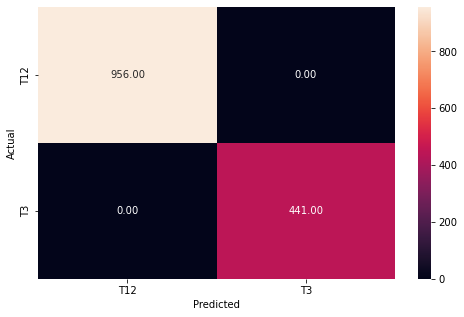

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       411
           1       0.68      0.61      0.64       189

    accuracy                           0.79       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.78      0.79      0.78       600



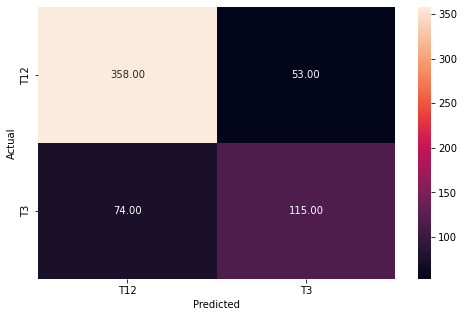

In [42]:
d_tree = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.68, 1: 0.32})
d_tree.fit(x_train, y_train)
y_pred_train = d_tree.predict(x_train)
metrics_score(y_train, y_pred_train)
y_pred_test = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00       956

    accuracy                           1.00      1912
   macro avg       1.00      1.00      1.00      1912
weighted avg       1.00      1.00      1.00      1912



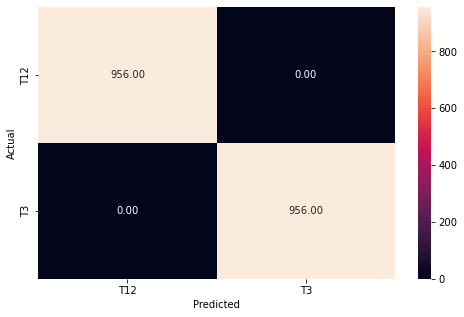

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       411
           1       0.62      0.59      0.60       189

    accuracy                           0.76       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.75      0.76      0.75       600



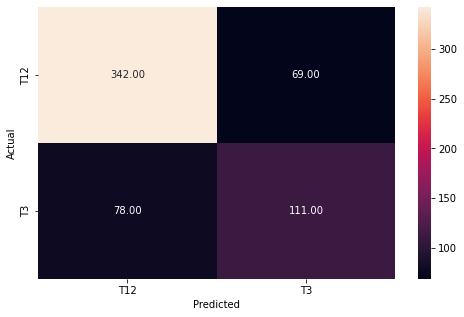

In [43]:
d_tree = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.68, 1: 0.32})
d_tree.fit(sm_x_train, sm_y_train)
y_pred_train = d_tree.predict(sm_x_train)
metrics_score(sm_y_train, y_pred_train)
y_pred_test = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test)

### Hyperparameter tuning of the decision tree

In [44]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.68, 1: 0.32})
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.68, 1: 0.32}, criterion='entropy',
                       max_depth=5, min_samples_leaf=25, random_state=7)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       956
           1       0.82      0.52      0.64       441

    accuracy                           0.81      1397
   macro avg       0.82      0.74      0.76      1397
weighted avg       0.81      0.81      0.80      1397



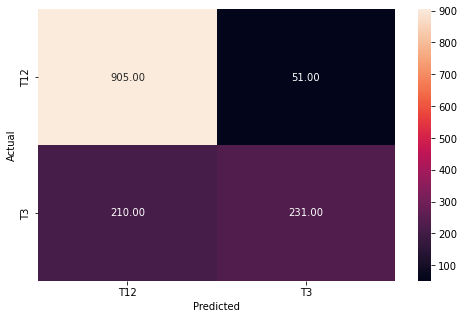

In [45]:
y_pred_train2 = d_tree_tuned.predict(x_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       411
           1       0.62      0.59      0.60       189

    accuracy                           0.76       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.75      0.76      0.75       600



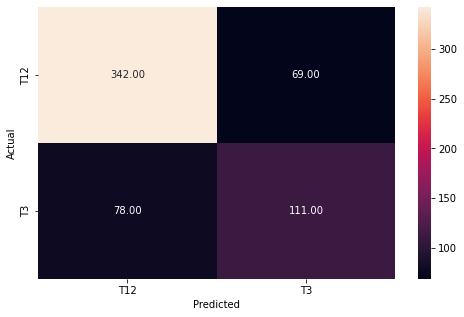

In [46]:
y_pred_test2 = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test2)

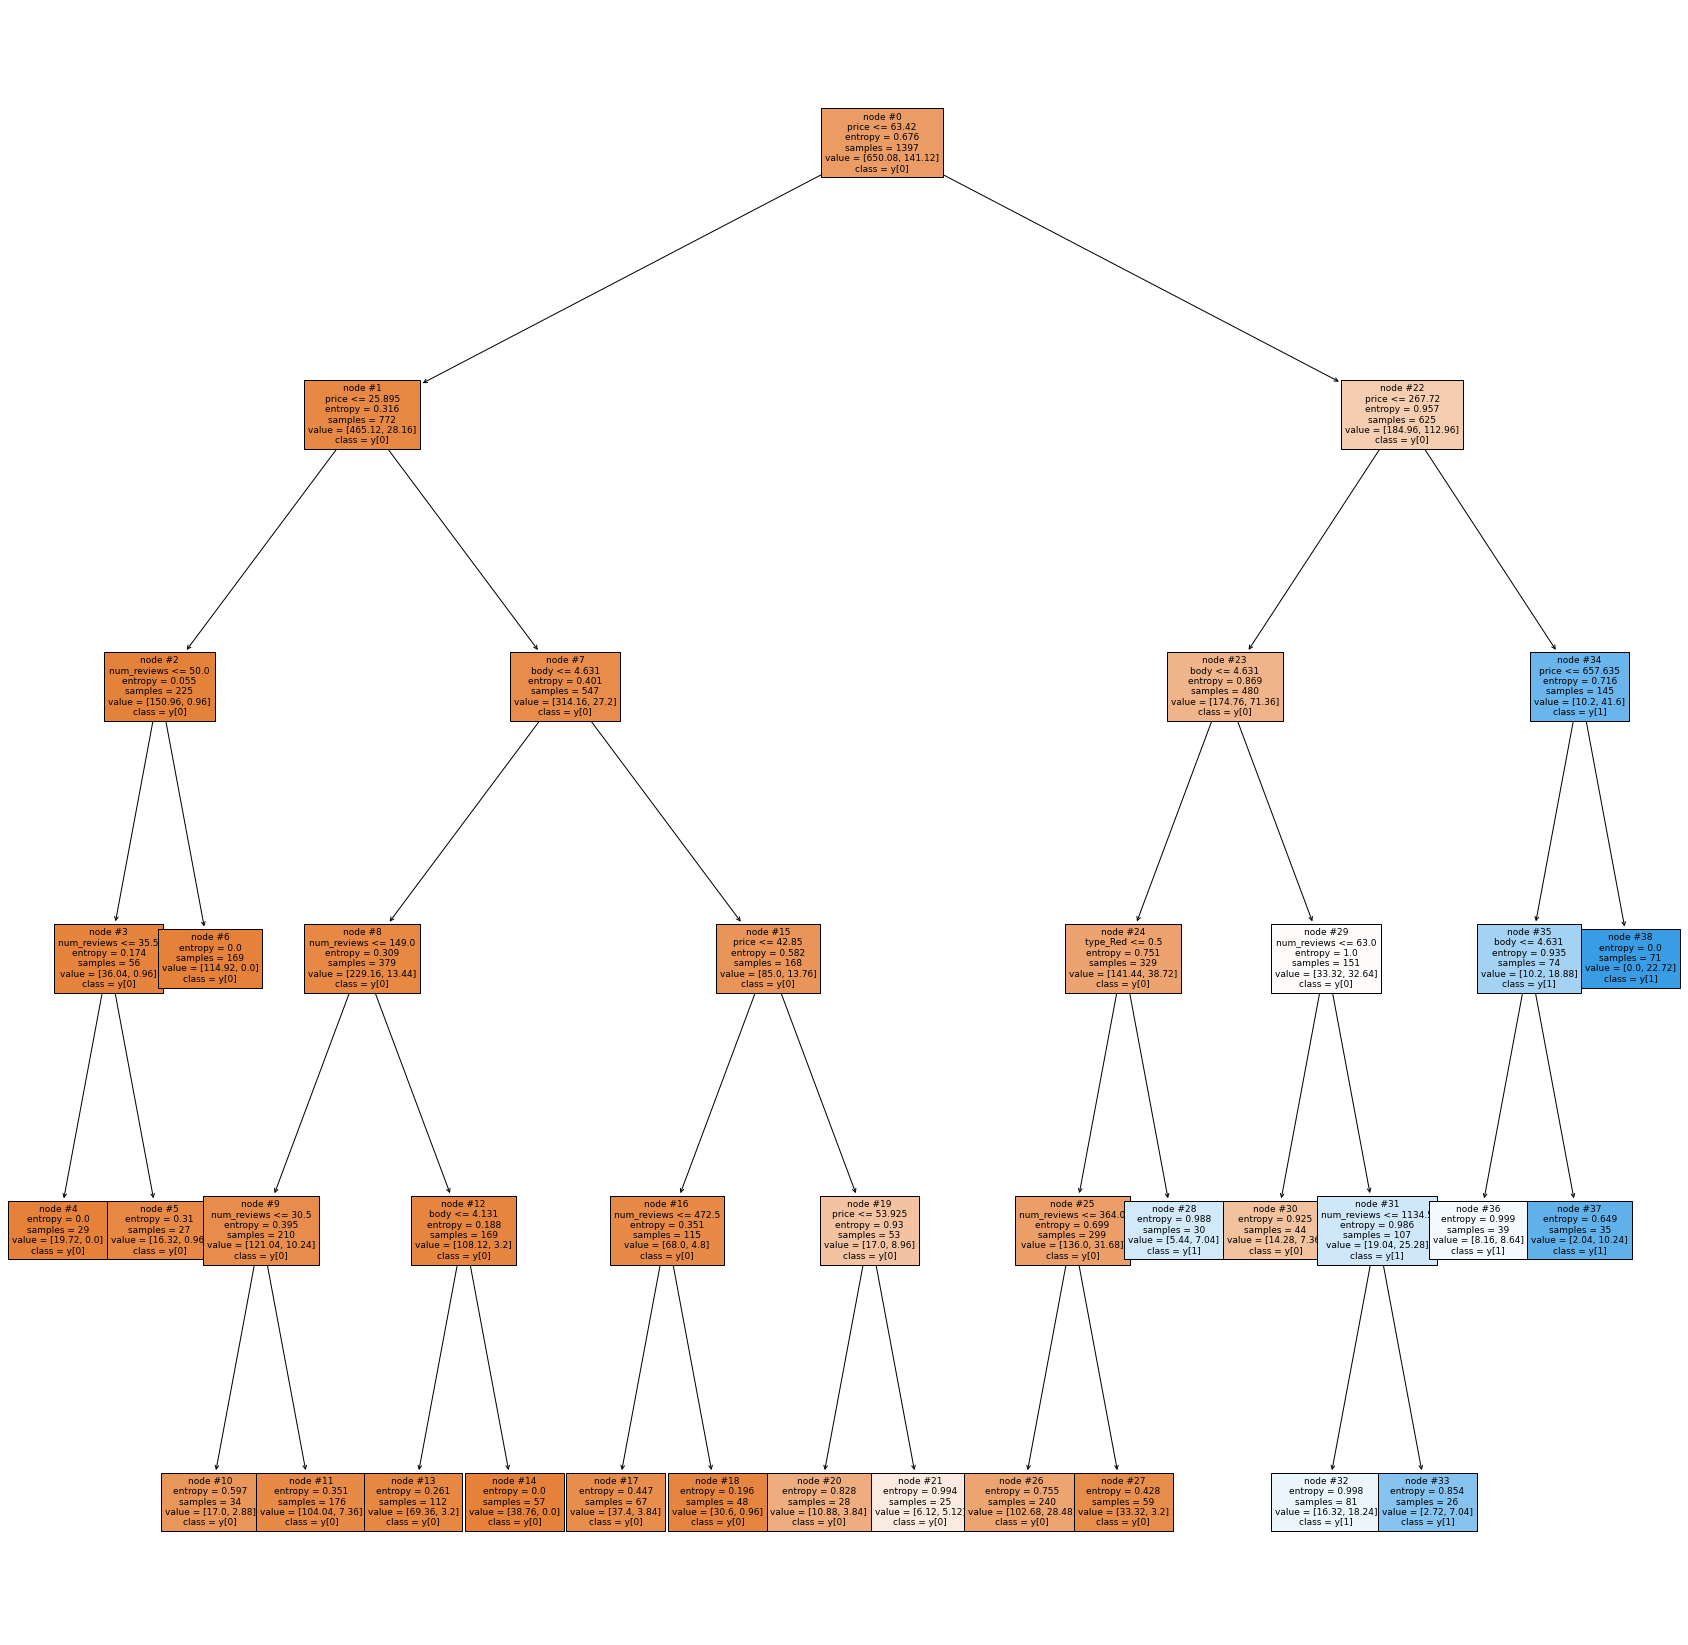

In [47]:
features = list(X.columns)
plt.figure(figsize = (30,30))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [48]:
#feature importance
wine_type_col = ['type_Toro Red', 'type_Tempranillo', 'type_Ribera Del Duero Red',
       'type_Pedro Ximenez', 'type_Red', 'type_Sherry',
       'type_Priorat Red', 'type_Rioja Red', 'type_Rioja White',
       'type_Grenache', 'type_Unknown', 'type_Cava', 'type_Verdejo',
       'type_Syrah', 'type_Monastrell', 'type_Mencia', 'type_Sparkling',
       'type_Montsant Red', 'type_Chardonnay',
       'type_Cabernet Sauvignon', 'type_Sauvignon Blanc']

print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))
print(print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).loc[wine_type_col].sort_values(by = 'Imp', ascending = False)))
#identify wines that meet this criteria


                                                         Imp
price                                               0.798326
body                                                0.108658
num_reviews                                         0.064232
type_Red                                            0.028784
type_Unknown                                        0.000000
...                                                      ...
wine_30 Years VORS Pedro Ximenez Sherry             0.000000
wine_30 Years V.O.R.S Very Old Palo Cortado Ble...  0.000000
wine_3.9                                            0.000000
wine_27 Ribera del Duero                            0.000000
type_Verdejo                                        0.000000

[1484 rows x 1 columns]
                                Imp
type_Red                   0.028784
type_Toro Red              0.000000
type_Cava                  0.000000
type_Cabernet Sauvignon    0.000000
type_Chardonnay            0.000000
type_Montsant Red          

In [49]:
features = list(X.columns)

### Decision Tree with Oversampling 

In [50]:
#look at balance in the data, yes, balanced since oversampled
print(sm_y_train.reset_index().columns)
totalrows=sm_y_train.reset_index().value_counts().sum()
totalrows
winetype_balance=sm_y_train.reset_index().groupby('quartile_rating').count()
values=round(winetype_balance/totalrows,2)#array of the weights
values

Index(['index', 'quartile_rating'], dtype='object')


,index
quartile_rating,
0,0.5
1,0.5


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00       956

    accuracy                           1.00      1912
   macro avg       1.00      1.00      1.00      1912
weighted avg       1.00      1.00      1.00      1912



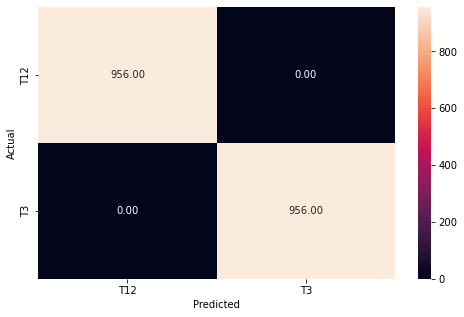

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       411
           1       0.64      0.63      0.64       189

    accuracy                           0.77       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.77      0.77      0.77       600



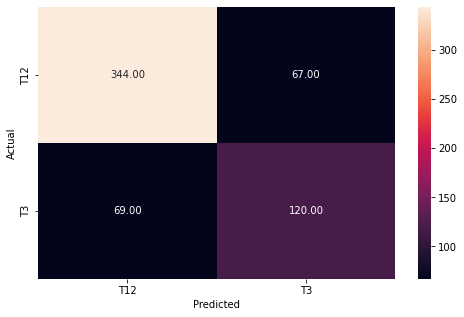

In [51]:
d_tree = DecisionTreeClassifier(random_state = 7, class_weight =  {0: 0.50, 1: 0.50})
d_tree.fit(sm_x_train, sm_y_train)
y_pred_train = d_tree.predict(sm_x_train)
metrics_score(sm_y_train, y_pred_train)
y_pred_test = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test)

In [52]:
text_representation=tree.export_text(d_tree,feature_names= list(x_train.reset_index().columns[:1484])) #text representation since this tree is bigger
print(text_representation)

|--- num_reviews <= 56.01
|   |--- num_reviews <= 38.32
|   |   |--- index <= 79.50
|   |   |   |--- num_reviews <= 25.89
|   |   |   |   |--- winery_Pedralonga <= 0.50
|   |   |   |   |   |--- region_Costers del Segre <= 0.50
|   |   |   |   |   |   |--- winery_Vegalfaro <= 0.50
|   |   |   |   |   |   |   |--- num_reviews <= 19.70
|   |   |   |   |   |   |   |   |--- num_reviews <= 19.32
|   |   |   |   |   |   |   |   |   |--- body <= 2.96
|   |   |   |   |   |   |   |   |   |   |--- body <= 2.92
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- body >  2.92
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- body >  2.96
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- num_reviews >  19.32
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- num_reviews >  19.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |

In [53]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       411
           1       0.75      0.47      0.58       189

    accuracy                           0.79       600
   macro avg       0.77      0.70      0.72       600
weighted avg       0.78      0.79      0.77       600



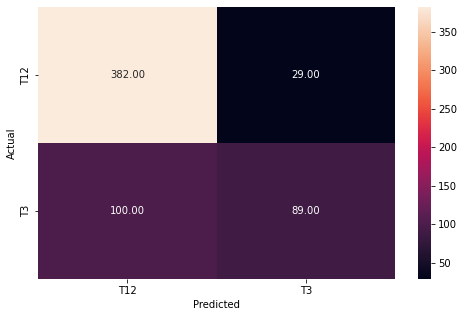

In [54]:
y_pred_test3 = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test3)

In [55]:
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)
# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [56]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       956
           1       0.82      0.65      0.72       441

    accuracy                           0.84      1397
   macro avg       0.83      0.79      0.81      1397
weighted avg       0.84      0.84      0.84      1397



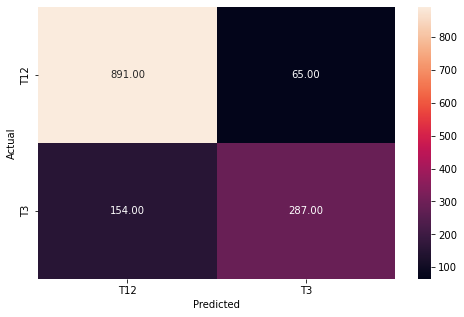

In [57]:
y_pred_train4 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train4)

In [58]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.68, 1: 0.32}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       956
           1       0.87      0.43      0.57       441

    accuracy                           0.80      1397
   macro avg       0.83      0.70      0.72      1397
weighted avg       0.81      0.80      0.78      1397



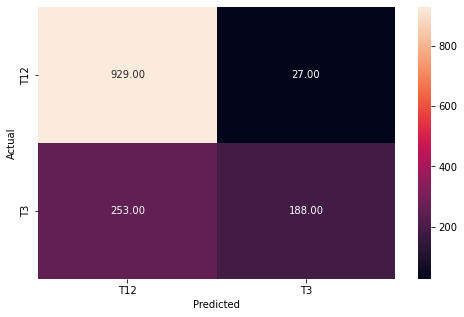

In [59]:
y_pred_train5 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train5) #worse performance from grid search?

In [63]:
print(wineSPA.shape)
wineSPA.to_csv('SPAIN_WINE.csv')

(1997, 11)
